In [1]:
import pd3
study = pd3.Study()
study.load_file("/home/reap2020/notebooks/spaghetti.pb")

True

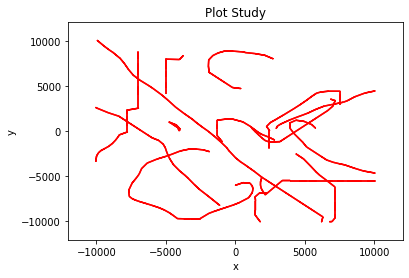

In [17]:
import importlib
import pd3_plot_colors
importlib.reload(pd3_plot_colors)
from pd3_plot_colors import normalize, plot_study, plot_study3D

x = normalize(1,0,0)
y = normalize(0,1,0)
    
plot_study(study) # Markus's code

# Download paraview if you want (just to see hwat they do)
# Find a way to reuse DFS (probably mamek a new function that returns lines)
# Color by slip system

In [14]:
class Graph(object):
    def __init__(self, protobuf, timestep, x_axis, y_axis):
        self.protobuf = protobuf
        self.timestep = timestep
        self.x_axis = x_axis
        self.y_axis = y_axis

        self.not_visited = set()
        self.visited = set()
        self.node_vectors = {}
        self.node_vectors_projection = {}
        self.links = {}
        
        # basically create_graph here
        def create_graph(study, timestep, x_axis, y_axis, not_visited, node_vectors, node_vectors_2d, links):
            """! \brief Creates a graph

            Exports a graph from protobuf, and gets the edge and node information
            \param Takes in a graph
            \param Takes in x_axis and y_axis for plotting
            \param Takes in a set which represents the nodes that have been visited
            \param Takes in 2 lookup for node_id to to node_vector.
            """

            graph = study.export_protobuf()
            vertices = graph.state[timestep].nodes
            edges = graph.state[timestep].links
            g = {}
        #     links = { 
        #        node_a: { node_b: segment_info } }
        #     node

            for edge in edges:
                not_visited.add(edge.leading)
                not_visited.add(edge.trailing)
                leading_neighbors = g.get(edge.leading, [])
                leading_neighbors.append(edge.trailing)
                trailing_neighbors = g.get(edge.trailing, [])
                trailing_neighbors.append(edge.leading)
                g[edge.leading] = leading_neighbors
                g[edge.trailing] = trailing_neighbors

            for edge in edges: # (1, 2)
                if edge.leading not in links:
                    links[edge.leading] = {}

                if edge.trailing not in links:
                    links[edge.trailing] = {}

                links[edge.leading][edge.trailing] = edge.slip
                links[edge.trailing][edge.leading] = edge.slip

            for node_id in vertices:
                node = vertices[node_id]
                node_3d = np.array([node.x, node.y, node.z])
                node_vectors[node_id] = node_3d

                node_x = x_axis.dot(node_3d)
                node_y = y_axis.dot(node_3d)
                node_vectors_2d[node_id] = (node_x, node_y)

                return g

NameError: name 'links' is not defined